In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Project_reviews/conversation_train.csv')

data.columns = ["name","topic","type","conversation"]

data.head(10)

data_v=pd.read_csv('/content/drive/MyDrive/Project_reviews/conversation_test.csv')

data_v.columns = ["name","topic","type","conversation"]

data_v.head(10)

,name,topic,type,conversation
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [ ]:
data = data.drop("type",axis=1)

In [ ]:
data.topic.unique()

data = data[(data.topic == "Overwatch") | (data.topic == "AssassinsCreed") | (data.topic == "FIFA") | (data.topic == "Cyberpunk2077") | (data.topic == "CallOfDuty")]

print(len(data))
data.head(10)
data.topic.unique()

data_v = data_v[(data_v.topic == "Overwatch") | (data_v.topic == "AssassinsCreed") | (data_v.topic == "FIFA") | (data_v.topic == "Cyberpunk2077") | (data_v.topic == "CallOfDuty")]

print(len(data_v))

11616
164


CallOfDuty        20.609504
FIFA              20.144628
Overwatch         20.092975
Cyberpunk2077     19.834711
AssassinsCreed    19.318182
Name: topic, dtype: float64


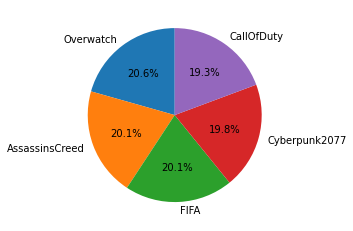

In [ ]:
f=data['topic'].value_counts()
print((f*100)/f.sum())
plt.pie(f,labels=["Overwatch","AssassinsCreed","FIFA","Cyberpunk2077","CallOfDuty"],autopct='%1.1f%%',startangle=90)
plt.show()

FIFA              23.170732
AssassinsCreed    20.121951
Overwatch         19.512195
CallOfDuty        18.902439
Cyberpunk2077     18.292683
Name: topic, dtype: float64


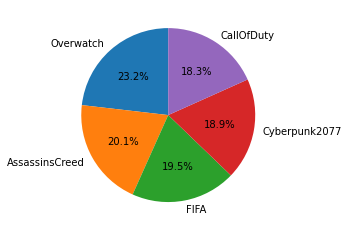

In [ ]:
f_v=data_v['topic'].value_counts()
print((f_v*100)/f_v.sum())
plt.pie(f_v,labels=["Overwatch","AssassinsCreed","FIFA","Cyberpunk2077","CallOfDuty"],autopct='%1.1f%%',startangle=90)
plt.show()

In [ ]:
data.duplicated().sum()

data_v.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
#1
def reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, str(line)) for line in reviews]
    
    return reviews
#2
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words
#3
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [ ]:
conv_t = data["conversation"]

conv_v = data_v["conversation"]

target = data['topic']

#1
reviewt = reviews(conv_t)
reviewv = reviews(conv_v)
#2
no_stop_words_t = remove_stop_words(reviewt)
no_stop_words_v = remove_stop_words(reviewv)
#3
stemmed_reviews_t = get_stemmed_text(no_stop_words_t)
stemmed_reviews_test = get_stemmed_text(no_stop_words_v)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(stemmed_reviews_t)
X = tfidf_vectorizer.transform(stemmed_reviews_t)
X_test = tfidf_vectorizer.transform(stemmed_reviews_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, target, train_size = 0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

text_classifier = RandomForestClassifier(n_estimators=50, random_state=0)
text_classifier.fit(X_train, y_train)

y_pred=text_classifier.predict(X_val)
print("y_pred: \n",y_pred)
print(classification_report(y_val,y_pred))

y_pred: 
 ['FIFA' 'CallOfDuty' 'CallOfDuty' ... 'Overwatch' 'FIFA' 'FIFA']
                precision    recall  f1-score   support

AssassinsCreed       0.93      0.93      0.93       432
    CallOfDuty       0.95      0.94      0.95       481
 Cyberpunk2077       0.90      0.92      0.91       415
          FIFA       0.98      0.91      0.95       445
     Overwatch       0.89      0.94      0.92       457

      accuracy                           0.93      2230
     macro avg       0.93      0.93      0.93      2230
  weighted avg       0.93      0.93      0.93      2230



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50,), random_state=1,max_iter=1000)

In [ ]:
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=1000,
              random_state=1)

In [ ]:
prediction = clf.predict(X_val)
print(classification_report(y_val,prediction))

                precision    recall  f1-score   support

AssassinsCreed       0.93      0.92      0.93       432
    CallOfDuty       0.93      0.93      0.93       481
 Cyberpunk2077       0.93      0.90      0.92       415
          FIFA       0.96      0.93      0.95       445
     Overwatch       0.89      0.96      0.92       457

      accuracy                           0.93      2230
     macro avg       0.93      0.93      0.93      2230
  weighted avg       0.93      0.93      0.93      2230



Neural Networks



EX - 1



In [ ]:
data['label_id'] = data['topic'].factorize()[0]
cat_id = data[['topic', 'label_id']].drop_duplicates().sort_values('label_id')
cat_to_id = dict(cat_id.values)
id_to_cat = dict(cat_id[['label_id', 'topic']].values)


id_to_cat

{0: 'Overwatch',
 1: 'AssassinsCreed',
 2: 'FIFA',
 3: 'CallOfDuty',
 4: 'Cyberpunk2077'}

In [ ]:
label = data['label_id'].values
text = data['conversation'].values

print('Value of [label]:', label, "\n")
print('Value of [text]:', text)

Value of [label]: [0 0 0 ... 4 4 4] 

Value of [text]: ["Had a fun ti8me being trash buddies with @Fauwxx on Overwatch. Can't wait to see what other shenanigans we get up to"
 "Had fun being trash buddies with @ Fauwxx on Overwatch. I can't wait to see what else we do."
 "Had a fun ti8me being trash buddies with @ wonderwatch. Can't wait to see what other shenanigans we get up to"
 ...
 "(Cyber)Punk's not there. Yet... Just told Magda, that I want neons.. A lot of neons.. I got them.. and the view!.. Pic | site: Mesarthim Photo and Retouch.."
 "( and Cyber ) Punk's right not dropping dead. Yet... I told Magda, that really I want a neons.. A lot of neons.. I already got half them.. because Enjoy the view!.. Pic and edit : John Mesarthim Photo and Digital Retouch.."
 "(Cyber)Punk's not dead. Yet... We told someone, If we want neons.. lot lot cheap neons.. I got them.. Enjoy this view!.. Photographer and colour: Mesarthim Photo and colour.."]


In [ ]:
maxfeatures = 10000

#tokenization
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = maxfeatures)
for i in range(len(text)):
  text[i] = str(text[i])
  
tokenizer.fit_on_texts(text)

In [ ]:
maxseqlen = max([len(i.split()) for i in text])
print(maxseqlen)

194


In [ ]:
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxseqlen)
y = to_categorical(label, num_classes = 5)

print("Shape of data tensor ['text']:", X.shape)
print("Shape of data tensor ['label']:", y.shape)

Shape of data tensor ['text']: (11149, 194)
Shape of data tensor ['label']: (11149, 5)


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(8919, 194) (8919, 5)
(2230, 194) (2230, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Embedding, Dense, GlobalMaxPool1D
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(input_dim = maxfeatures, output_dim = 128, input_length = maxseqlen))
model.add(LSTM(128, return_sequences = True))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))


opt = RMSprop(learning_rate=0.0012, rho=0.7, momentum=0.5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 194, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 194, 128)          131584    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [ ]:
history = model.fit(Xtrain, ytrain,batch_size = 100, epochs = 20, shuffle = True,validation_split = 0.15, verbose = 1,callbacks=early_stop)

Epoch 1/20
76/76 [==============================] - 53s 660ms/step - loss: 1.4016 - accuracy: 0.3823 - val_loss: 0.9061 - val_accuracy: 0.6181
Epoch 2/20
76/76 [==============================] - 50s 652ms/step - loss: 0.7132 - accuracy: 0.7118 - val_loss: 0.5331 - val_accuracy: 0.8094
Epoch 3/20
76/76 [==============================] - 48s 633ms/step - loss: 0.4187 - accuracy: 0.8442 - val_loss: 0.4382 - val_accuracy: 0.8445
Epoch 4/20
76/76 [==============================] - 50s 657ms/step - loss: 0.3032 - accuracy: 0.8945 - val_loss: 0.4077 - val_accuracy: 0.8610
Epoch 5/20
76/76 [==============================] - 48s 631ms/step - loss: 0.2321 - accuracy: 0.9215 - val_loss: 0.3586 - val_accuracy: 0.8767
Epoch 6/20
76/76 [==============================] - 49s 643ms/step - loss: 0.1917 - accuracy: 0.9346 - val_loss: 0.3734 - val_accuracy: 0.8804
Epoch 7/20
76/76 [==============================] - 48s 636ms/step - loss: 0.1629 - accuracy: 0.9433 - val_loss: 0.3614 - val_accuracy: 0.8924

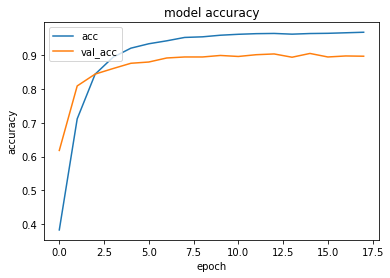

In [ ]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

def evaluation(model, X, Y):
  global Y_pred, Y_act
  Y_pred = model.predict(X)
  Y_pred_class = np.argmax(Y_pred, axis=1)
  rounded_labels=np.argmax(Y, axis=1)
  Y_act = rounded_labels
  
  accuracy = accuracy_score(Y_act, Y_pred_class)
  return accuracy

accuracy = evaluation(model, Xtest, ytest)
print('accuracy: %.3f' % (accuracy * 100), '%')

70/70 [==============================] - 8s 107ms/step
accuracy: 89.641 %


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

target = ["OW","AC","FIFA","CP2077","COD"]
print(confusion_matrix(Y_act, np.argmax(Y_pred, axis=1)))
print(classification_report(Y_act, np.argmax(Y_pred, axis = 1), target_names = target))

[[409   4  20  10   9]
 [ 11 392  17   9  13]
 [ 18   8 405   1   3]
 [ 24   9  14 437   7]
 [ 21   8  16   9 356]]
              precision    recall  f1-score   support

          OW       0.85      0.90      0.87       452
          AC       0.93      0.89      0.91       442
        FIFA       0.86      0.93      0.89       435
      CP2077       0.94      0.89      0.91       491
         COD       0.92      0.87      0.89       410

    accuracy                           0.90      2230
   macro avg       0.90      0.90      0.90      2230
weighted avg       0.90      0.90      0.90      2230



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

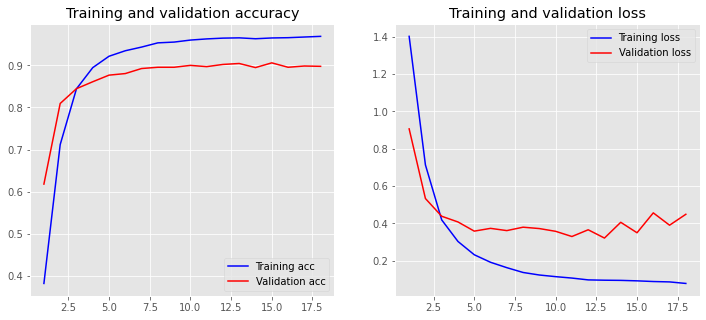

In [ ]:
plot_history(history)